In [1]:
%cd "c:/Users/adamj/PycharmProjects/ytdrama"

c:\Users\adamj\PycharmProjects\ytdrama


In [54]:
import spacy
from spacy import displacy
from ytdrama.db import read_channel_vids, Video

videos = read_channel_vids("President Sunday")

- ADJ: adjective, e.g. big, old, green, incomprehensible, first
- ADP: adposition, e.g. in, to, during
- ADV: adverb, e.g. very, tomorrow, down, where, there
- AUX: auxiliary, e.g. is, has (done), will (do), should (do)
- CONJ: conjunction, e.g. and, or, but
- CCONJ: coordinating conjunction, e.g. and, or, but
- DET: determiner, e.g. a, an, the
- INTJ: interjection, e.g. psst, ouch, bravo, hello
- NOUN: noun, e.g. girl, cat, tree, air, beauty
- NUM: numeral, e.g. 1, 2017, one, seventy-seven, IV, MMXIV
- PART: particle, e.g. ’s, not,
- PRON: pronoun, e.g I, you, he, she, myself, themselves, somebody
- PROPN: proper noun, e.g. Mary, John, London, NATO, HBO
- PUNCT: punctuation, e.g. ., (, ), ?
- SCONJ: subordinating conjunction, e.g. if, while, that
- SYM: symbol, e.g. $, %, §, ©, +, −, ×, ÷, =, :), 
- VERB: verb, e.g. run, runs, running, eat, ate, eating
- X: other, e.g. sfpksdpsxmsa
- SPACE: space, e.g.


In [55]:
from typing import Iterable
from collections import Counter
from pprint import pprint

remove_stopwords = True

def transcripts() -> Iterable: 
    for video in videos: 
        yield video.transcript.text()
        
def adjectives() -> Iterable: 
    for doc in docs:
        for item in doc: 
            if remove_stopwords and item.is_stop: 
                continue
            if item.tag_ == "JJ": 
                yield item.lemma_


spacy.require_cpu() #type: ignore

nlp = spacy.load("en_core_web_sm")
docs = nlp.pipe(transcripts(), n_process=8)

counts = Counter(adjectives())
pprint(counts.most_common(10))

[('good', 80),
 ('social', 76),
 ('right', 73),
 ('sure', 72),
 ('different', 71),
 ('little', 63),
 ('political', 58),
 ('ultimate', 53),
 ('bad', 45),
 ('wrong', 44)]


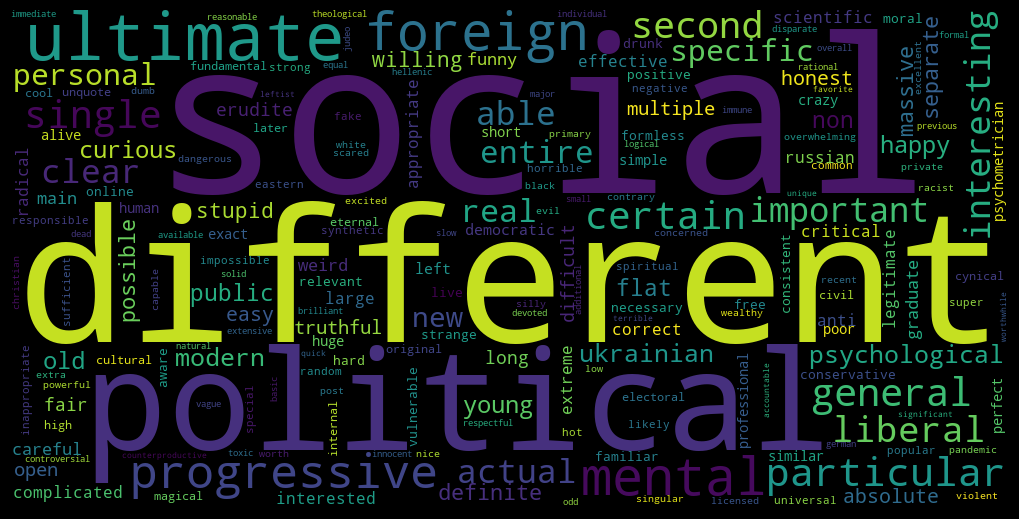

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

frequency = dict(counts)
del frequency["good"]
del frequency["bad"]
del frequency["sure"]
del frequency["fine"]
del frequency["okay"]
del frequency["big"]
del frequency["little"]
del frequency["right"]
del frequency["wrong"]
del frequency["true"]
del frequency["false"]
del frequency["-"]
del frequency["great"]
del frequency["sorry"]
# del frequency["hard"]
# del frequency["fair"]

wordcloud = WordCloud(width=1000, height=500, collocation_threshold=1).generate_from_frequencies(frequency)

plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()